# **Time series forecasting for Google stock price**

# Introduction

This project aims to perform time series forecasting on Google stock prices using historical data from 2010 to 2022. The goal is to develop an accurate model to predict future stock prices, leveraging the ARIMA (AutoRegressive Integrated Moving Average) model. The process involves loading the dataset, conducting exploratory data analysis (EDA) to understand its structure and characteristics, preprocessing the data for modeling, splitting it into training and testing sets, and finally building and evaluating the forecasting model. The focus is primarily on the 'Close' price of the stock, as it is a widely used indicator in financial analysis and provides a reliable measure of the stock's value at the end of each trading day.

# Description of Data

Here's a brief description of each column:

1.Date: The date of the recorded financial data.

2.High: The highest price of the financial asset (e.g., stock) during the given date.

3.Low: The lowest price of the financial asset during the given date.

4.Open: The opening price of the financial asset at the beginning of the given date.

5.Close: The closing price of the financial asset at the end of the given date.

6.Volume: The trading volume or the number of shares/contracts traded during the given date.

7.Adj Close: The adjusted closing price of the financial asset at the end of the given date. Adjusted closing prices take into account factors such as dividends and stock splits.

Mounting to the drive

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import necessary libraries

In [56]:
#Data manipulation
import pandas as pd
import numpy as np
#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Data preprocessing
from datetime import date
# from pandas.tseries.offsets import DateOffset
# #Data analysis
# import plotly.express as px
# Modeling
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
# !pip install pmdarima
# from pmdarima.arima import auto_arima
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [57]:
df=pd.read_csv("/content/drive/MyDrive/Google_Stock_Train (2010-2022).csv")    #Reading the csv file
df.head()                                                                      #gives top 5 rows

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028


## Data Preprocessing

In [58]:
# df=df[['Date','Close']]
# df.head()

In [59]:
df.info() #gives information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3272 non-null   object 
 1   Open       3272 non-null   float64
 2   High       3272 non-null   float64
 3   Low        3272 non-null   float64
 4   Close      3272 non-null   float64
 5   Adj Close  3272 non-null   float64
 6   Volume     3272 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 179.1+ KB


In [60]:
df.columns #gives columns name

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [61]:
df.describe(include="all")  #gives statistical information about the data

,Date,Open,High,Low,Close,Adj Close,Volume
count,3272,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3.272000e+03
unique,3272,NaN,NaN,NaN,NaN,NaN,NaN
top,2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,49.161187,49.650301,48.653316,49.160898,49.160898,6.017541e+07
std,NaN,35.810449,36.216443,35.387644,35.804094,35.804094,4.957609e+07
min,NaN,10.968719,11.068068,10.851602,10.912663,10.912663,9.312000e+06
25%,NaN,20.281718,20.426113,20.172359,20.295858,20.295858,2.894200e+07
50%,NaN,38.527750,38.931249,38.224501,38.563002,38.563002,4.123200e+07
75%,NaN,61.837625,62.265000,61.218125,61.738001,61.738001,7.927251e+07


checking null values

In [62]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

by observing above output we can say there is no null values in our dataset,so there is no need of data cleaning

converting Date column in datetime format

In [63]:
df['Date'] = df['Date'].apply(pd.to_datetime) #convert into datetime format

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3272 non-null   datetime64[ns]
 1   Open       3272 non-null   float64       
 2   High       3272 non-null   float64       
 3   Low        3272 non-null   float64       
 4   Close      3272 non-null   float64       
 5   Adj Close  3272 non-null   float64       
 6   Volume     3272 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 179.1 KB


by observing above we can say Date column is converted into datetime format

# Stationary Testing

Checking the data is stationary or not by visualization

Text(0.5, 1.0, 'Google Stock Price Over Time')

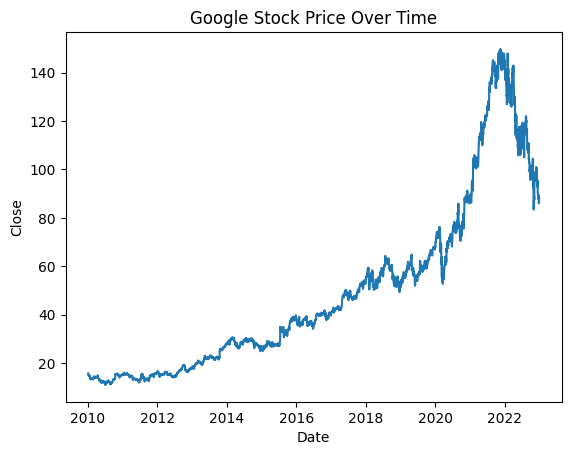

In [65]:
sns.lineplot(x=df['Date'],y=df['Close'])
plt.title('Google Stock Price Over Time')

Checking the data is stationary or not by using Dicky Fuller test

In [66]:
# test_result = adfuller(df['Close'])
# test_op= pd.Series(test_result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
# print(test_op)
# if test_result[1] <= 0.05:
#         print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
# else:
#     print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
def adfuller_test(close):
    result=adfuller(close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
adfuller_test(df['Close'])


ADF Test Statistic : -0.630788131705103
p-value : 0.8638723239459678
#Lags Used : 22
Number of Observations Used : 3249
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


After testing and observing above outputs we can say that the data is non-stationary because the value of p is greater than 0.05

# Differencing

To make the non-stationary data as stationary we need to do differencing

In [84]:
df["Close First Difference"]=df["Close"]-df["Close"].shift(1) # Differencing
# df["Close First Difference"]

0            NaN
1      -0.069069
2      -0.393643
3      -0.354355
4       0.198199
          ...   
3267    1.470001
3268   -1.840004
3269   -1.370002
3270    2.430000
3271   -0.219994
Name: Close First Difference, Length: 3272, dtype: float64

<Axes: >

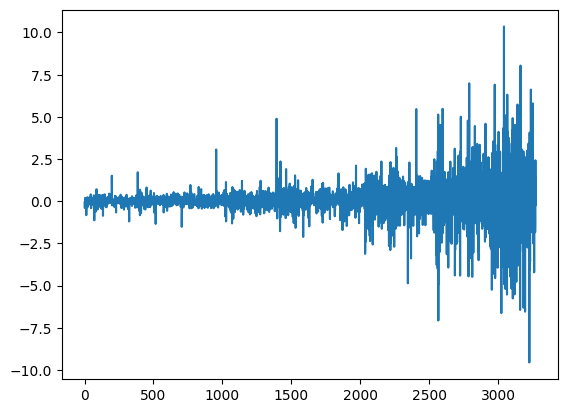

In [68]:
df["Close First Difference"].plot() #visuallization of differencing

Seasonal differencing

In [69]:
df["Close Seasonal First Difference"]=df["Close"]-df["Close"].shift(12)  #Seasonal differencing

<Axes: >

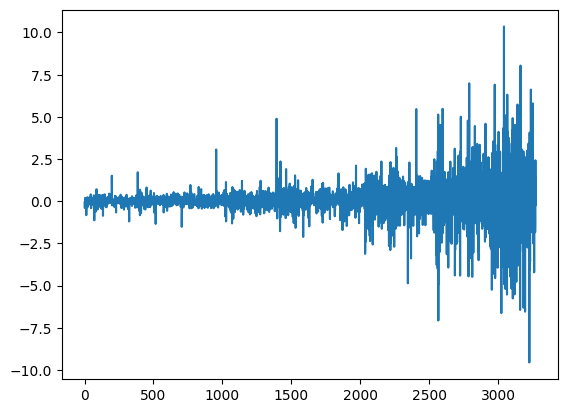

In [70]:
df["Close First Difference"].plot() #visuallization of differencing

After doing differencing we need to check the stationarity again by doing dickey fuller test

In [71]:
#again test dickey fuller test
adfuller_test(df["Close Seasonal First Difference"].dropna())

ADF Test Statistic : -8.936451025502976
p-value : 9.505606921190188e-15
#Lags Used : 29
Number of Observations Used : 3230
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


From observing above output we can say that the value of p is reduced

## Finding p and q values

Finding p and q values by plotting Autocorrelation and Partial autocorrelation graphs

In [72]:
# fig=plt.figure(figsize=(12,8))
# ax1=fig.add_subplot(211)
# fig=plot_acf(df['Close Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
# ax2=fig.add_subplot(212)
# fig=plot_pacf(df['Close Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

Plotting Autocorrelation graph to find p value

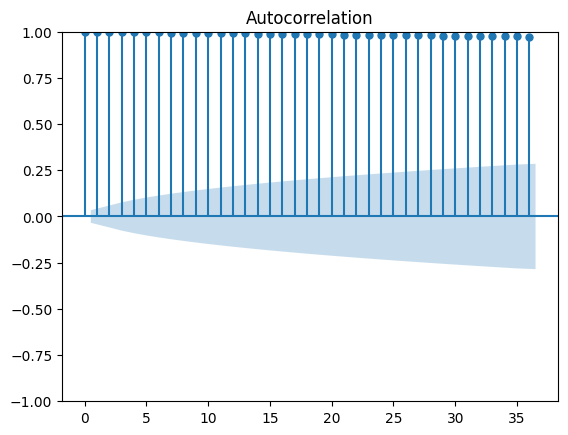

In [73]:

# for finding value of p
x_acf=pd.DataFrame(df['Close'])
plot_acf(x_acf)
plt.show()


Plotting Partial correlation graph to find q value

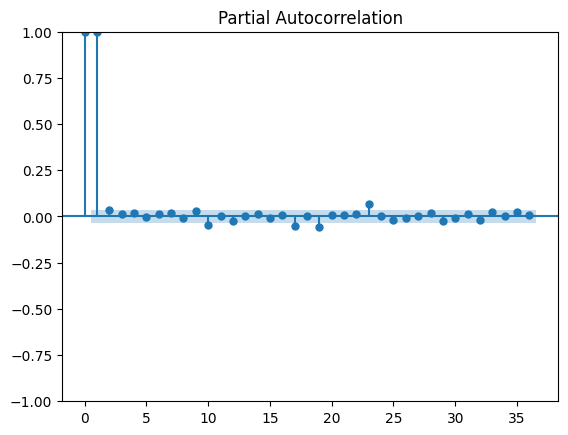

In [74]:
#finding value of Q
x_pacf=pd.DataFrame(df['Close'])
plot_pacf(x_pacf)
plt.show()

By observing above plots we can say that the value of p=1 and q=2

# Modelling

Fitting Autodarima before fitting ARIMA model

In [75]:
# !pip install pmdarima
# from pmdarima.arima import auto_arima
model=auto_arima(df['Close'],start_p=1,start_q=1,test='adf',max_p=3,max_q=3,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,error_action='ignore',suppress_warnings=True)
model.fit


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=9.45 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=12346.854, Time=0.22 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=11339.102, Time=1.69 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=7.99 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=12339.146, Time=0.22 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=10924.493, Time=2.32 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=26.85 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=11.65 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=10942.424, Time=1.77 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=10926.363, Time=3.19 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=10926.079, Time=7.27 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=10924.757, Time=2.48 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=10927.851, Time=14.83 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=10926.490, Time=11.66 sec

Best model:  ARIMA(1,1,0

<bound method ARIMA.fit of ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)>

It automatically determines the optimal parameters for an ARIMA model, such as the order of differencing, autoregressive (AR) terms, and moving average (MA) terms

In [76]:
model.summary()     #summary of model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 3272
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -5458.246
Date:                            Tue, 02 Jul 2024   AIC                          10924.493
Time:                                    09:36:05   BIC                          10948.849
Sample:                                         0   HQIC                         10933.217
                                           - 3272                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0782      0.009     -9.175      0.000      -0.095      -0.061
ar.S.L12      -0.6978      0.008    -88.904      0.000      -0.713      -0.682
ar.S.L24      -0.3503      0.008    -41.808      0.000      -0.367      -0.334
sigma2         1.6647      0.017    100.236      0.000       1.632       1.697
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             15028.38
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              43.75   Skew:                             0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Fitting ARIMA model

# ARIMA MODEL

In [77]:
# stasts model and arima
from statsmodels.tsa.arima.model import ARIMA
p,d,q=1,1,2                             #defining p,d,q values

model=ARIMA(df['Close'],order=(p,d,q))  #Fitting ARIMA
model=model.fit()
model.summary()                         #Model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 3272
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -5028.079
Date:                Tue, 02 Jul 2024   AIC                          10064.158
Time:                        09:36:06   BIC                          10088.529
Sample:                             0   HQIC                         10072.886
                               - 3272                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7834      0.072     10.894      0.000       0.642       0.924
ma.L1         -0.8442      0.074    -11.442      0.000      -0.989      -0.700
ma.L2          0.0209      0.013      1.605      0.108      -0.005       0.046
sigma2         1.2667      0.012    107.835      0.000       1.244       1.290
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             21077.78
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              44.06   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Forcasting

After fitting we need to predict and forecast it for number of days we need

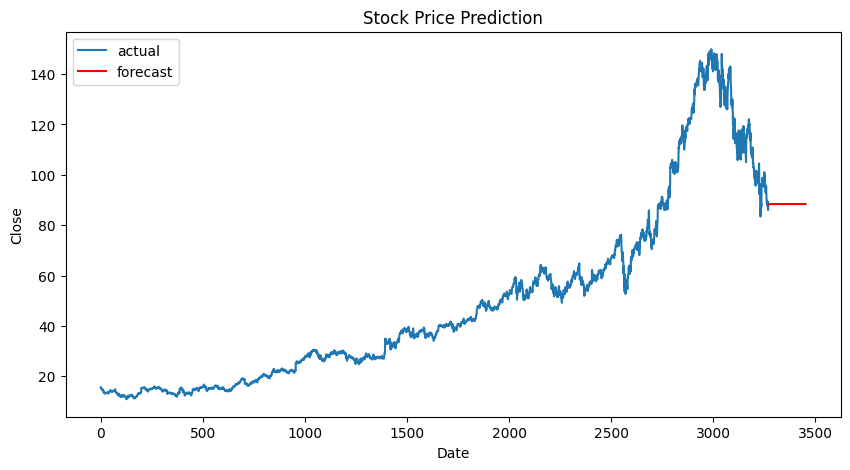

In [78]:
# predicting the next 180 days
forecast=model.predict(start=len(df["Close"]),end=len(df["Close"])+180)
forecast

# plot forecast
plt.figure(figsize=(10,5))
plt.plot(df['Close'],label='actual')
plt.plot(forecast,color='red',label='forecast')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

By observing above plot the red line indicate the forecasting of next 180 days

# SARIMA MODEL

If sesaonal is there then use sarima

In [79]:

p,d,q=4,1,4                                                         #defining p,d,q values
model=SARIMAX(df['Close'],order=(p,d,q),seasonal_order=(p,d,q,12))  #Fitting SARIMA
model=model.fit()
print(model.summary())                                              #model summary

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 3272
Model:             SARIMAX(4, 1, 4)x(4, 1, 4, 12)   Log Likelihood               -5019.966
Date:                            Tue, 02 Jul 2024   AIC                          10073.933
Time:                                    09:43:52   BIC                          10177.449
Sample:                                         0   HQIC                         10111.011
                                           - 3272                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2995      0.048      6.197      0.000       0.205       0.394
ar.L2          0.6061      0.031   

Forecasing it for 180 days

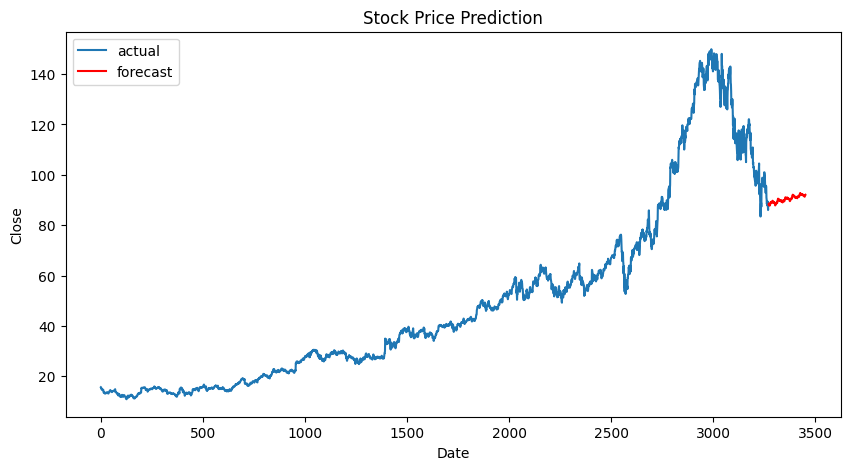

In [80]:
# predict the next 180 days
predictions=model.predict(start=len(df["Close"]),end=len(df["Close"])+180)

# plot the prediction
plt.figure(figsize=(10,5))
plt.plot(df['Close'],label='actual')
plt.plot(predictions,color="red",label='forecast')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

By observing above plot the red line indicate the forecasting of next 180 days

In [81]:
# df.set_index('Date',inplace=True)
# future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
# future_dataset_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
# future_df=pd.concat([df,future_dataset_df])
# future_df['forecast'] = model.predict(start = 8, end = 12, dynamic= True)
# future_dataset_df

## Hypertuning

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
Best SARIMAX(1, 1, 1)x(0, 0, 1, 12)12 - AIC:10034.862984016667


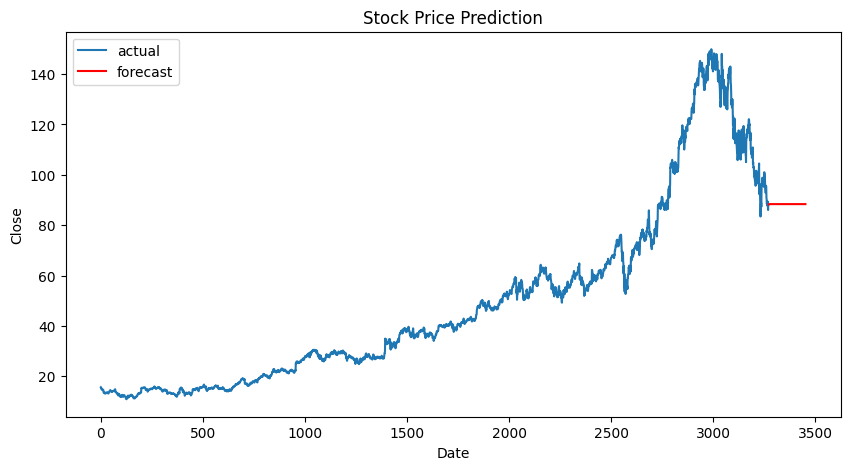

In [83]:
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[1],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[1]))

best_aic=np.inf
best_pdq=None
best_seasonal_pdq=None
best_model=None


for param in pdq:
  for param_seasonal in seasonal_pdq:
     try:

        temp_model=SARIMAX(df['Close'],order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
        results=temp_model.fit()

        if results.aic<best_aic:
          best_model=results
          best_pdq=param
          best_seasonal_pdq=param_seasonal
          best_aic=results.aic
     except:
        continue
        temp_model=temp_model.fit()
print('Best SARIMAX{}x{}12 - AIC:{}'.format(best_pdq,best_seasonal_pdq,best_aic))


# predict next 180 days
model=SARIMAX(df['Close'],order=best_pdq,seasonal_order=best_seasonal_pdq,enforce_stationarity=False,enforce_invertibility=False)
model=model.fit()
predictions=model.predict(start=len(df["Close"]),end=len(df["Close"])+180)

plt.figure(figsize=(10,5))
plt.plot(df['Close'],label='actual')
plt.plot(predictions,color="red",label='forecast')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Stock Price Prediction')
plt.legend(loc="upper left")
plt.show()

Above output shows the forecast after hypertuning


# Conclusion

* The best-performing SARIMA model was identified with parameters (1, 1, 1) x (0, 0, 1, 12), based on the lowest AIC value (10034.862894016667).
* The model predicts a slight decline in stock prices in the immediate future, consistent with the recent trend observed in the actual data.

* The forecasted stock prices (in red) show a relatively flat trend compared to the actual stock prices (in blue), indicating that the model predicts a stable price in the immediate future
* To improve the accuracy of future forecasts, consider experimenting with more advanced models such as Long Short-Term Memory (LSTM) networks, or Prophet. Additionally, perform further hyperparameter tuning and include more recent data to better capture the current market trends.